In [1]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import LSTM, Dense , Dropout
from keras.callbacks import EarlyStopping
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf

df = yf.download('EPOL')["Adj Close"].dropna()
print(df.isnull().sum())
print(df.tail())

[*********************100%***********************]  1 of 1 completed
0
Date
2023-10-10    17.889999
2023-10-11    18.139999
2023-10-12    17.760000
2023-10-13    17.910000
2023-10-16    19.260000
Name: Adj Close, dtype: float64


Here's we check for nulls to be sure, and view the data.

Values are prepare data to numpy array with shape (n_samples, n_features) like rows and columns in dataframe, MinMax set data from 0 to 1, thas is needed to normalize the data before training the LSTM model.

In [2]:
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(df.values.reshape(-1, 1))

We are creating a sequence for 14 days...

In [3]:
def create_dataset(data, look_back):
    X, y = [], []
    for i in range(len(data)-look_back-1):
        X.append(data[i:(i+look_back), 0])
        y.append(data[i + look_back, 0])
    return np.array(X), np.array(y)
look_back = 14
X, y = create_dataset(data_scaled, look_back)

Train data will be used for model evaluation, and test later for find out if model forecast properly ( on non trained data) recommended to used the parameter ( random_state=42) to produce the same results across a different run.

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,shuffle=False)

In [5]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(128, input_shape=(look_back, 1), return_sequences=True))
model.add(Dropout(0.02))  # Add dropout to the first LSTM layer
model.add(LSTM(128, return_sequences=True))
model.add(Dropout(0.02))  # Add dropout to the second LSTM layer
model.add(LSTM(128))
model.add(Dense(1))

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 14, 128)           66560     
                                                                 
 dropout (Dropout)           (None, 14, 128)           0         
                                                                 
 lstm_1 (LSTM)               (None, 14, 128)           131584    
                                                                 
 dropout_1 (Dropout)         (None, 14, 128)           0         
                                                                 
 lstm_2 (LSTM)               (None, 128)               131584    
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 329,857
Trainable params: 329,857
Non-trai

In [7]:
model.compile(optimizer='adam', loss='mean_squared_error',metrics=['mean_absolute_error', 'mean_squared_error'])


In [8]:
callback=[EarlyStopping(patience=10, restore_best_weights=True)]
history = model.fit(X_train, y_train, validation_split=0.3,callbacks=callback, epochs=200, batch_size=32, verbose=2)

Epoch 1/200
59/59 - 10s - loss: 0.0232 - mean_absolute_error: 0.0990 - mean_squared_error: 0.0232 - val_loss: 0.0031 - val_mean_absolute_error: 0.0425 - val_mean_squared_error: 0.0031 - 10s/epoch - 177ms/step
Epoch 2/200
59/59 - 3s - loss: 0.0021 - mean_absolute_error: 0.0354 - mean_squared_error: 0.0021 - val_loss: 0.0025 - val_mean_absolute_error: 0.0380 - val_mean_squared_error: 0.0025 - 3s/epoch - 44ms/step
Epoch 3/200
59/59 - 3s - loss: 0.0020 - mean_absolute_error: 0.0348 - mean_squared_error: 0.0020 - val_loss: 0.0023 - val_mean_absolute_error: 0.0366 - val_mean_squared_error: 0.0023 - 3s/epoch - 44ms/step
Epoch 4/200
59/59 - 3s - loss: 0.0021 - mean_absolute_error: 0.0351 - mean_squared_error: 0.0021 - val_loss: 0.0019 - val_mean_absolute_error: 0.0331 - val_mean_squared_error: 0.0019 - 3s/epoch - 45ms/step
Epoch 5/200
59/59 - 3s - loss: 0.0019 - mean_absolute_error: 0.0337 - mean_squared_error: 0.0019 - val_loss: 0.0026 - val_mean_absolute_error: 0.0390 - val_mean_squared_erro

In [9]:
pred_test = model.predict(X_test)
print(pred_test)

21/21 [==============================] - 3s 17ms/step
[[0.42767575]
 [0.4270752 ]
 [0.44847012]
 [0.45477387]
 [0.45374763]
 [0.45514965]
 [0.44540006]
 [0.43129352]
 [0.43330768]
 [0.42145392]
 [0.40816677]
 [0.41630065]
 [0.4226618 ]
 [0.4181191 ]
 [0.4060563 ]
 [0.3979274 ]
 [0.39609236]
 [0.41020226]
 [0.41991112]
 [0.42229986]
 [0.42730647]
 [0.42806405]
 [0.4144587 ]
 [0.40367338]
 [0.3909684 ]
 [0.3868923 ]
 [0.3866772 ]
 [0.3735043 ]
 [0.35928163]
 [0.3514138 ]
 [0.36588484]
 [0.3724019 ]
 [0.36928123]
 [0.37070912]
 [0.38568676]
 [0.39828998]
 [0.41556114]
 [0.42254755]
 [0.42287123]
 [0.42573118]
 [0.4297973 ]
 [0.42728168]
 [0.43648916]
 [0.44791222]
 [0.45233607]
 [0.44718388]
 [0.44141254]
 [0.4399618 ]
 [0.4352056 ]
 [0.43918326]
 [0.4472965 ]
 [0.44803205]
 [0.4597867 ]
 [0.47870922]
 [0.4689793 ]
 [0.473273  ]
 [0.4574936 ]
 [0.46387047]
 [0.47331548]
 [0.49802253]
 [0.50520116]
 [0.51599634]
 [0.49766296]
 [0.49755263]
 [0.51009196]
 [0.5209304 ]
 [0.5329459 ]
 [0.5294

In [10]:
print(pred_test.shape)
print(y_test.shape)

(672, 1)
(672,)


In [11]:

predictions = scaler.inverse_transform(pred_test.reshape(-1, 1))
print(predictions)


real_values = scaler.inverse_transform(y_test.reshape(-1, 1))
print(real_values)

[[18.440514 ]
 [18.429407 ]
 [18.825052 ]
 [18.941624 ]
 [18.922647 ]
 [18.948574 ]
 [18.768278 ]
 [18.507414 ]
 [18.54466  ]
 [18.325457 ]
 [18.079742 ]
 [18.230158 ]
 [18.347794 ]
 [18.263786 ]
 [18.040716 ]
 [17.890392 ]
 [17.856457 ]
 [18.117384 ]
 [18.296925 ]
 [18.341099 ]
 [18.433683 ]
 [18.447693 ]
 [18.196096 ]
 [17.996649 ]
 [17.761703 ]
 [17.686325 ]
 [17.682348 ]
 [17.43875  ]
 [17.175737 ]
 [17.030241 ]
 [17.297846 ]
 [17.418362 ]
 [17.360653 ]
 [17.387058 ]
 [17.664032 ]
 [17.897097 ]
 [18.216484 ]
 [18.34568  ]
 [18.351665 ]
 [18.404552 ]
 [18.479744 ]
 [18.433226 ]
 [18.603495 ]
 [18.814735 ]
 [18.896544 ]
 [18.801266 ]
 [18.694538 ]
 [18.667713 ]
 [18.579758 ]
 [18.653315 ]
 [18.803349 ]
 [18.816952 ]
 [19.034323 ]
 [19.384249 ]
 [19.204317 ]
 [19.283718 ]
 [18.991919 ]
 [19.109842 ]
 [19.284504 ]
 [19.741398 ]
 [19.87415  ]
 [20.073778 ]
 [19.734749 ]
 [19.73271  ]
 [19.964592 ]
 [20.165022 ]
 [20.387218 ]
 [20.323156 ]
 [20.572618 ]
 [20.511234 ]
 [20.621485 ]
 [20.8

In [12]:
mae = np.mean(np.abs(predictions - real_values))
print('Mean Absolute Error:', mae)

Mean Absolute Error: 0.2751305273600987


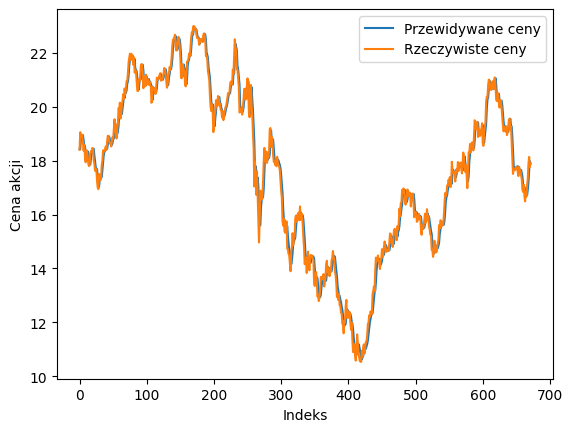

In [13]:
import matplotlib.pyplot as plt
plt.plot(predictions, label='Przewidywane ceny')
plt.plot(real_values, label='Rzeczywiste ceny')
plt.xlabel('Indeks')
plt.ylabel('Cena akcji')
plt.legend()
plt.show()

In [14]:
predictions=predictions.flatten()
pct_change_y_test = (np.diff(y_test) / y_test[:-1]) * 100
pct_change_predictions = (np.diff(predictions) / predictions[:-1]) * 100
direction_correct = np.sign(pct_change_y_test) == np.sign(pct_change_predictions)

# Utwórz DataFrame
df = pd.DataFrame({
    'Real data': y_test[1:],  # Pomijamy pierwszy element, ponieważ nie mamy poprzedniej wartości
    'Predicted price': predictions[1:],  # Pomijamy pierwszy element, ponieważ nie mamy poprzedniej wartości
    'Real data pct_change': pct_change_y_test,
    'Predicted price pct_change': pct_change_predictions,
    'Correct direction': direction_correct
})
# Show data with correct direction
print(df)
print("Accurency":df["Correct direction"].sum()/len(df["Correct direction"]))

     Real data  Predicted price  Real data pct_change  \
0     0.460975        18.429407              8.302152   
1     0.455259        18.825052             -1.240096   
2     0.452141        18.941624             -0.684835   
3     0.455779        18.922647              0.804507   
4     0.439669        18.948574             -3.534485   
..         ...              ...                   ...   
666   0.368164        16.932121              3.811982   
667   0.397906        17.194925              8.078402   
668   0.411425        17.628988              3.397539   
669   0.390876        17.982426             -4.994556   
670   0.398988        17.891073              2.075181   

     Predicted price pct_change  Correct direction  
0                     -0.060229              False  
1                      2.146814              False  
2                      0.619236              False  
3                     -0.100183              False  
4                      0.137014              False

C:\Users\Marcin\AppData\Local\Temp\ipykernel_13588\699678317.py:4: RuntimeWarning: divide by zero encountered in divide
  pct_change_y_test = (np.diff(y_test) / y_test[:-1]) * 100


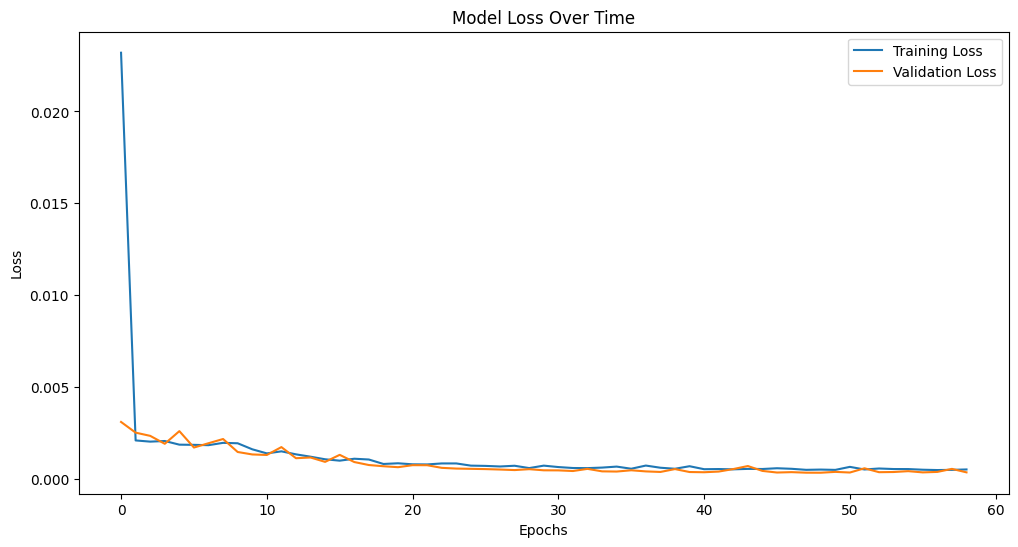

In [22]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Time')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()